In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.graphics.tsaplots import plot_acf

# ARIMA Model to Predict Avg Case Closure by Agent Type

### import data csv

In [17]:
df_combined = pd.read_csv('data/Case_Closure_(Oct22-Mar24).csv')

In [ ]:
df_combined.set_index('Date', inplace=True)

train_data, test_data = df_combined[0:int(len(df_combined)*0.9)], df_combined[int(len(df_combined)*0.9):]

### CSE

In [3]:
train_arima_CSE = train_data['Avg Case Closed Per CSE']
test_arima_CSE = test_data['Avg Case Closed Per CSE']

In [4]:
# CSE
# Initialize history with training data
history = [x for x in train_arima_CSE]
y = test_arima_CSE
predictions = list()
residuals = list()  # List to store residuals

# Iterate over test data to make predictions
for i in range(0, len(y)):
    model = ARIMA(history, order=(7,1,1))
    model_fit = model.fit()
    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions.append(yhat)
    # Get the observation from test data
    obs = y[i]
    # Calculate residual
    residual = obs - yhat
    residuals.append(residual)
    # Update the history with the observation
    history.append(obs)

C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\Ap

In [5]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 43.94412009108169
MAE: 4.92372471106752
RMSE: 6.629036135901033


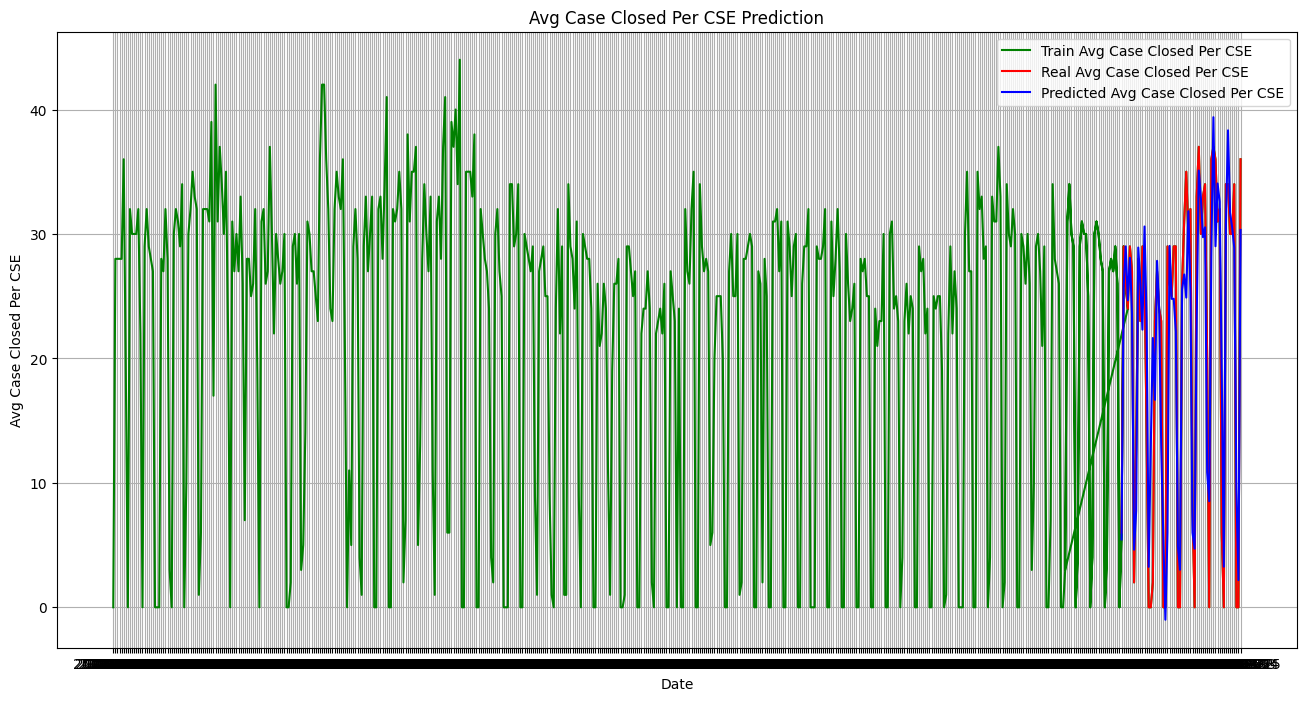

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df_combined.index[-600:], df_combined['Avg Case Closed Per CSE'].tail(600), color='green', label = 'Train Avg Case Closed Per CSE')
plt.plot(test_data.index, y, color = 'red', label = 'Real Avg Case Closed Per CSE')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Avg Case Closed Per CSE')
plt.title('Avg Case Closed Per CSE Prediction')
plt.xlabel('Date')
plt.ylabel('Avg Case Closed Per CSE')
plt.legend()
plt.grid(True)
plt.show()

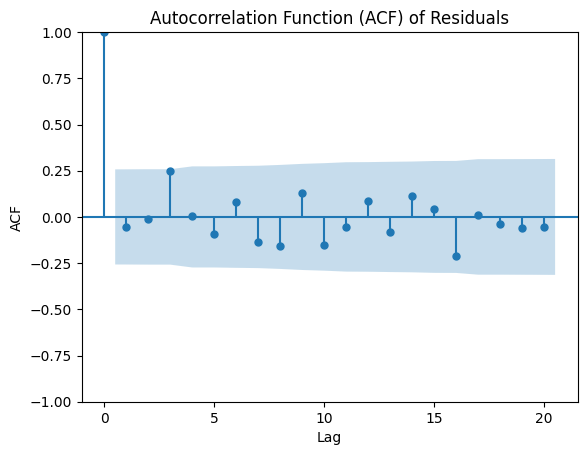

In [7]:
plot_acf(residuals, lags=20)  # Adjust 'lags' as needed
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

### CSA

In [8]:
train_arima_CSA = train_data['Avg Case Closed Per CSA']
test_arima_CSA = test_data['Avg Case Closed Per CSA']

In [9]:
# CSA
# Initialize history with training data
history = [x for x in train_arima_CSA]
y = test_arima_CSA
predictions = list()
residuals = list()  # List to store residuals

# Iterate over test data to make predictions
for i in range(0, len(y)):
    model = ARIMA(history, order=(7,1,1))
    model_fit = model.fit()
    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions.append(yhat)
    # Get the observation from test data
    obs = y[i]
    # Calculate residual
    residual = obs - yhat
    residuals.append(residual)
    # Update the history with the observation
    history.append(obs)

C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\Ap

In [10]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 28.7871028752702
MAE: 3.87934910580922
RMSE: 5.365361392792679


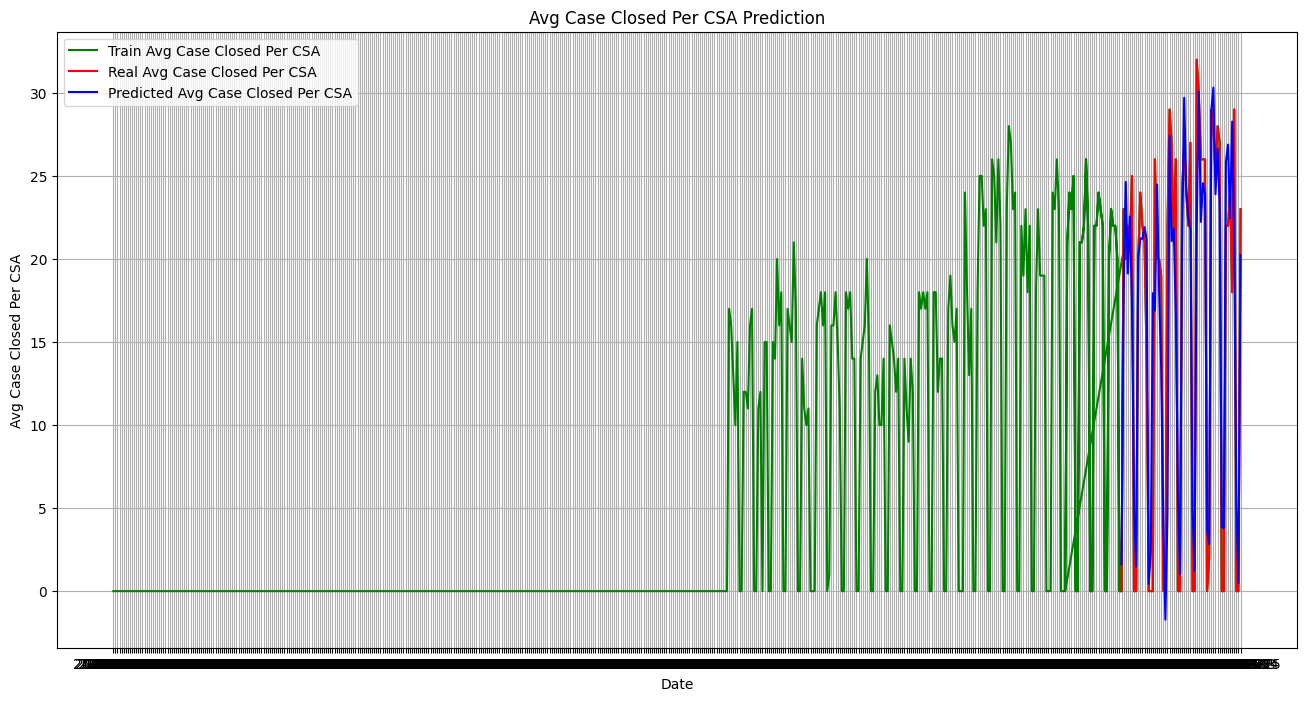

In [11]:
plt.figure(figsize=(16,8))
plt.plot(df_combined.index[-600:], df_combined['Avg Case Closed Per CSA'].tail(600), color='green', label = 'Train Avg Case Closed Per CSA')
plt.plot(test_data.index, y, color = 'red', label = 'Real Avg Case Closed Per CSA')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Avg Case Closed Per CSA')
plt.title('Avg Case Closed Per CSA Prediction')
plt.xlabel('Date')
plt.ylabel('Avg Case Closed Per CSA')
plt.legend()
plt.grid(True)
plt.show()

### Temp

In [12]:
train_arima_Temp = train_data['Avg Case Closed per Temp']
test_arima_Temp = test_data['Avg Case Closed per Temp']

In [13]:
# Temp
# Initialize history with training data
history = [x for x in train_arima_Temp]
y = test_arima_Temp
predictions = list()
residuals = list()  # List to store residuals

# Iterate over test data to make predictions
for i in range(0, len(y)):
    model = ARIMA(history, order=(7,1,1))
    model_fit = model.fit()
    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions.append(yhat)
    # Get the observation from test data
    obs = y[i]
    # Calculate residual
    residual = obs - yhat
    residuals.append(residual)
    # Update the history with the observation
    history.append(obs)

In [14]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 42.586347140229734
MAE: 5.4441470917760855
RMSE: 6.525821568218804


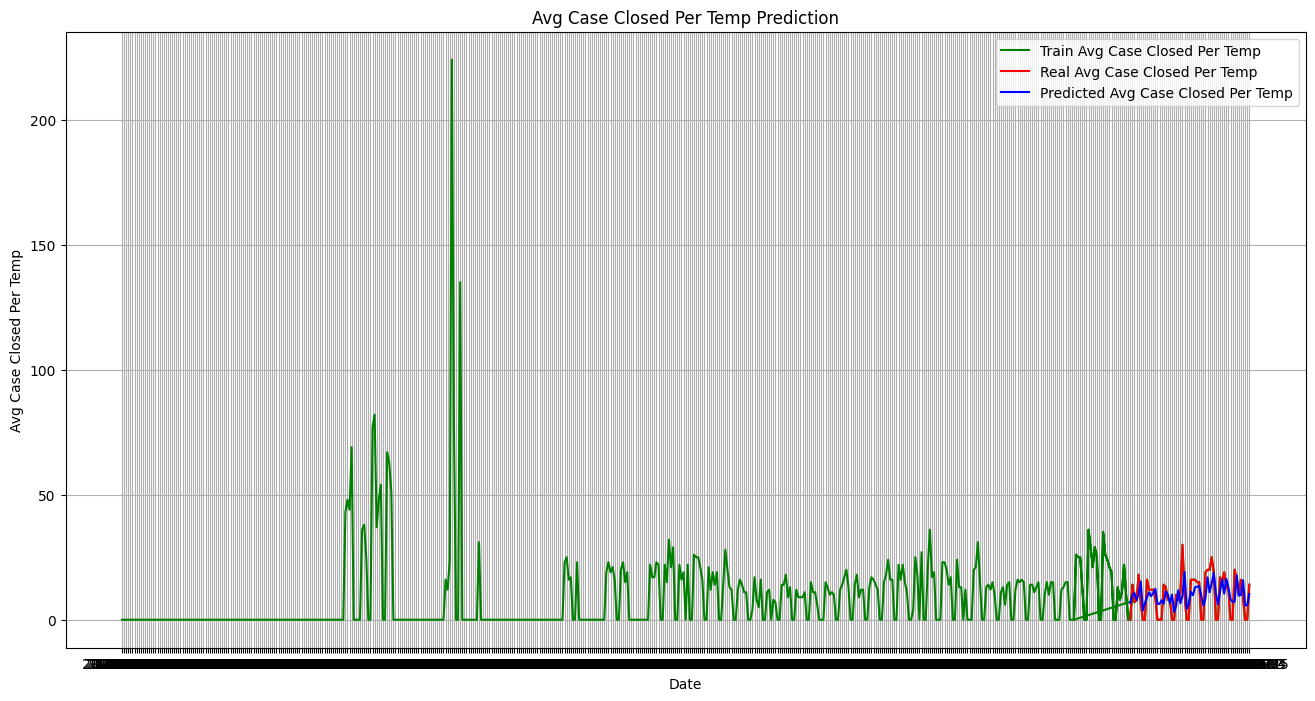

In [15]:
plt.figure(figsize=(16,8))
plt.plot(df_combined.index[-600:], df_combined['Avg Case Closed per Temp'].tail(600), color='green', label = 'Train Avg Case Closed Per Temp')
plt.plot(test_data.index, y, color = 'red', label = 'Real Avg Case Closed Per Temp')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Avg Case Closed Per Temp')
plt.title('Avg Case Closed Per Temp Prediction')
plt.xlabel('Date')
plt.ylabel('Avg Case Closed Per Temp')
plt.legend()
plt.grid(True)
plt.show()